# HOMEWORK 2
For this homework you will have to complete and implement the colour balancing for:
* Gray world algorithm
* Scale-by-max algorithm

You are free to use your own images. Experiment with more images and think about the effect each of the algorithms has on the resulting (balanced) image.

### Colour Balancing
In this notebook we will show different type of colour balancing making use of von Kries' hypothesis.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

### Gray world
This algorithm assumes that a scene, on average, is gray.

8.519791355839482 39.72914328398528 31.13646846347385
Coefficients= 3.1059212519677373 0.6660551637190616 0.8498652011699777
Min coefficient= 0.6660551637190616
Balanced coefficients= 4.663159181328407 1.0 1.2759681892181023
Mean Balanced= 36.35809870119448 39.72914328398528 39.28774120189525


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x2a0fead7f70>)

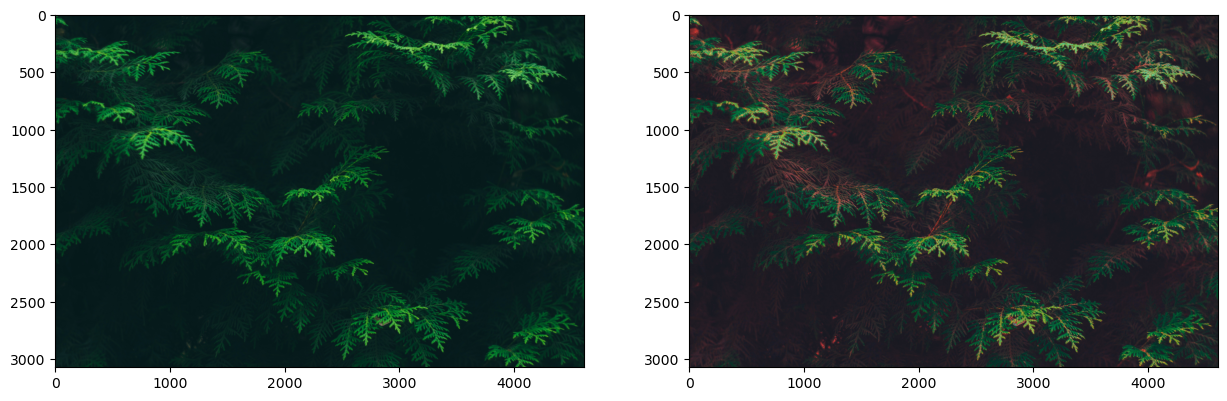

In [2]:
# Load your image
img = cv2.imread('green.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the mean values for all three colour channels (red, green, blue)

mean_r = np.mean(img[:,:,0])
mean_g = np.mean(img[:,:,1])
mean_b = np.mean(img[:,:,2])

print(mean_r, mean_g, mean_b)

avg=np.mean([mean_r, mean_g, mean_b]);

# Compute the coefficients kr, kg, kb
# Note: there are 3 coefficients to compute but we only have 2 equations.
# Therefore, you have to make an assumption, fix the value of one of the
# coefficients and compute the remining two
# Hint: You can fix the coefficient of the brightest colour channel to 1.

coef_r=avg/mean_r
coef_g=avg/mean_g
coef_b=avg/mean_b

print('Coefficients=', coef_r, coef_g, coef_b)
mincoef=np.min([coef_r, coef_g, coef_b]);
print('Min coefficient=', mincoef)

coef_r = coef_r/mincoef;
coef_g = coef_g/mincoef;
coef_b = coef_b/mincoef;
print('Balanced coefficients=', coef_r, coef_g, coef_b)

# Apply color balancing and generate the balanced image


balanced2 = img.copy()

balanced2[...,0] = img[...,0]*coef_r;
balanced2[...,1] = img[...,1]*coef_g;
balanced2[...,2] = img[...,2]*coef_b;

mean_r = np.mean(balanced2[:,:,0])
mean_g = np.mean(balanced2[:,:,1])
mean_b = np.mean(balanced2[:,:,2])

print('Mean Balanced=', mean_r, mean_g, mean_b)

# Show the original and the balanced image side by side
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced2)

### Scale-by-max
This is a straightforward algorithm that scales each colour channel by its maximum value. Note that it is sensitive to noise and saturations.

1.4166666666666667 1.1538461538461537 1.4912280701754386


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x2a08e4e3160>)

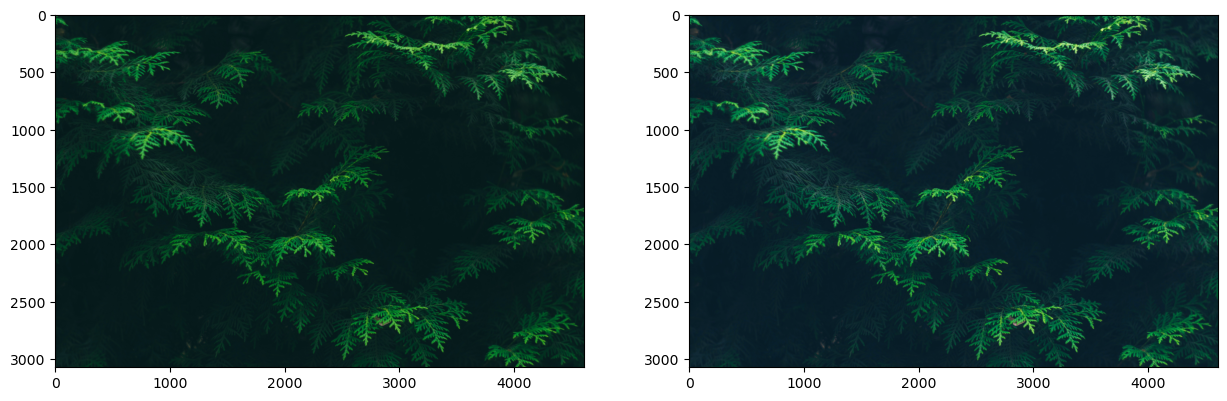

In [3]:
# Load your image
img = cv2.imread('green.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the maximum values for all three colour channels (red, green, blue)

max_r = np.max(img[..., 0])
max_g = np.max(img[..., 1])
max_b = np.max(img[..., 2])

coef_r = 255/max_r;
coef_g = 255/max_g;
coef_b = 255/max_b;
print(coef_r, coef_g, coef_b)


balanced = img.copy()

balanced[..., 0] = (img[..., 0]*coef_r)
balanced[..., 1] = (img[..., 1]*coef_g)
balanced[..., 2] = (img[..., 2]*coef_b)

# Apply scale-by-max balancing and generate the balanced image

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)